In [ ]:
!pip install numpy pandas tensorflow


Python 3.9.6


h


In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'tensorflow'

In [162]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [163]:
len(x_train),len(x_test),x_train[0].shape


(60000, 10000, (28, 28))

In [164]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

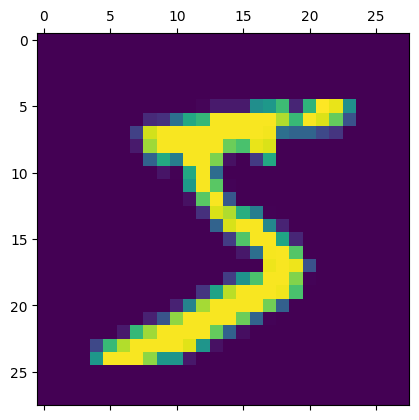

In [165]:
plt.matshow(x_train[0])


In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train.reshape(len(x_train),28*28))
x_test=scaler.transform(x_test.reshape(len(x_test),28*28))



np.uint8(2)

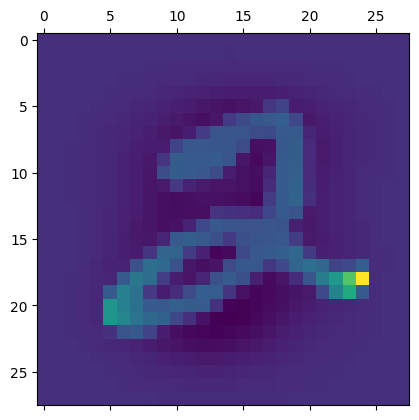

In [167]:
plt.matshow(x_train[5].reshape(28,28))
y_train[5]


In [168]:
model=keras.Sequential(
    [
        keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    ]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/Users/rafid/Desktop/deep learning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [169]:
x_train.shape

(60000, 784)

In [170]:
y_train=y_train.reshape(len(y_train),1)

In [171]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.8288 - loss: 0.6176
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.9185 - loss: 0.3188
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.9227 - loss: 0.3079
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.9271 - loss: 0.2740
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.9296 - loss: 0.2648
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.9282 - loss: 0.2657
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.9280 - loss: 0.2692
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.9327 - loss: 0.2485
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.9319 - loss: 0.2486
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.9312 - loss: 0.2430
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.9312 - loss: 0.2443
Epoch 12

In [172]:
predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step


In [173]:
np.argmax(predictions[0])

np.int64(7)

In [174]:
predictions=[np.argmax(i) for i in predictions]
predictions[2]

np.int64(1)

In [175]:
cm=tf.math.confusion_matrix(y_test,predictions=predictions)

Text(95.72222222222221, 0.5, 'true')

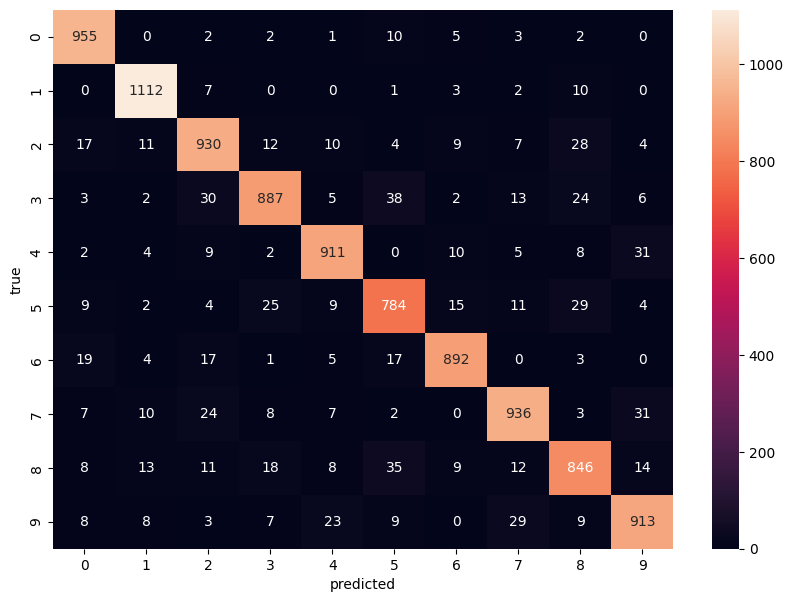

In [176]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('true')


In [185]:
model2=keras.Sequential(
    [
        keras.layers.Dense(50,input_shape=(784,),activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ]
)
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/Users/rafid/Desktop/deep learning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


: 

In [182]:
model2.fit(x_train,y_train,epochs=50)
cm=tf.math.confusion_matrix(y_test,predictions=predictions)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.8669 - loss: 0.4582
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.9618 - loss: 0.1279
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.9738 - loss: 0.0874
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.9788 - loss: 0.0692
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.9828 - loss: 0.0528
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 0.9860 - loss: 0.0458
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.9889 - loss: 0.0345
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.9893 - loss: 0.0318
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - accuracy: 0.9908 - loss: 0.0306
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.9928 - loss: 0.0243
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.9933 - loss: 0.0214
Epoch 12

In [183]:
predictions2=model2.predict(x_test)

predictions2=[np.argmax(i) for i in predictions2]

cm2=tf.math.confusion_matrix(y_test,predictions=predictions2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step


Text(95.72222222222221, 0.5, 'true')

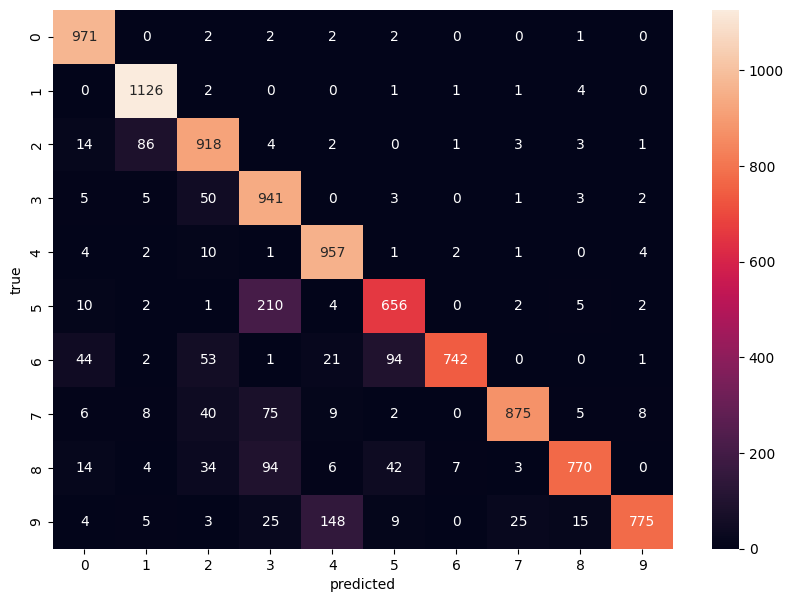

In [184]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm2,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('true')

In [1]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [2]:
sigmoid(100),sigmoid(1),sigmoid(-100)

(1.0, 0.7310585786300049, 3.7200759760208356e-44)

In [3]:
def tanh(x):
    return ((math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x)))

In [4]:
tanh(-56)

-1.0

In [10]:
tanh(-.75)

-0.6351489523872873

In [12]:
def relu(x):
    return max(0,x)

In [13]:
relu(100)

100

In [16]:
def leaky_relu(x):
    return max(0.1*x,x)

In [17]:
leaky_relu(-100000000)

-10000000.0